----
## Esercizio 6
----

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [174]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [16.0, 12.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':20,
    'savefig.directory':'./Images'

})

### Without External Field

In [175]:
file = ['cv','te','x','m']
theo = [0,0,0,0]
label = ['Specific Heat','Internal Energy','Susceptibility','Magnetization']
xlab = ['$C_V$','$E_{int}$','$\chi$','$M$']
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T

In [176]:
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
h=0.02 #external field

# Specific Heat
theo[0]=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

# Internal Energy
theo[1] = -J*( th + ch*thN )/( 1 + thN )

# Susceptibility
theo[2] = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

# Magnetization
b=beta
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
theo[3] = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

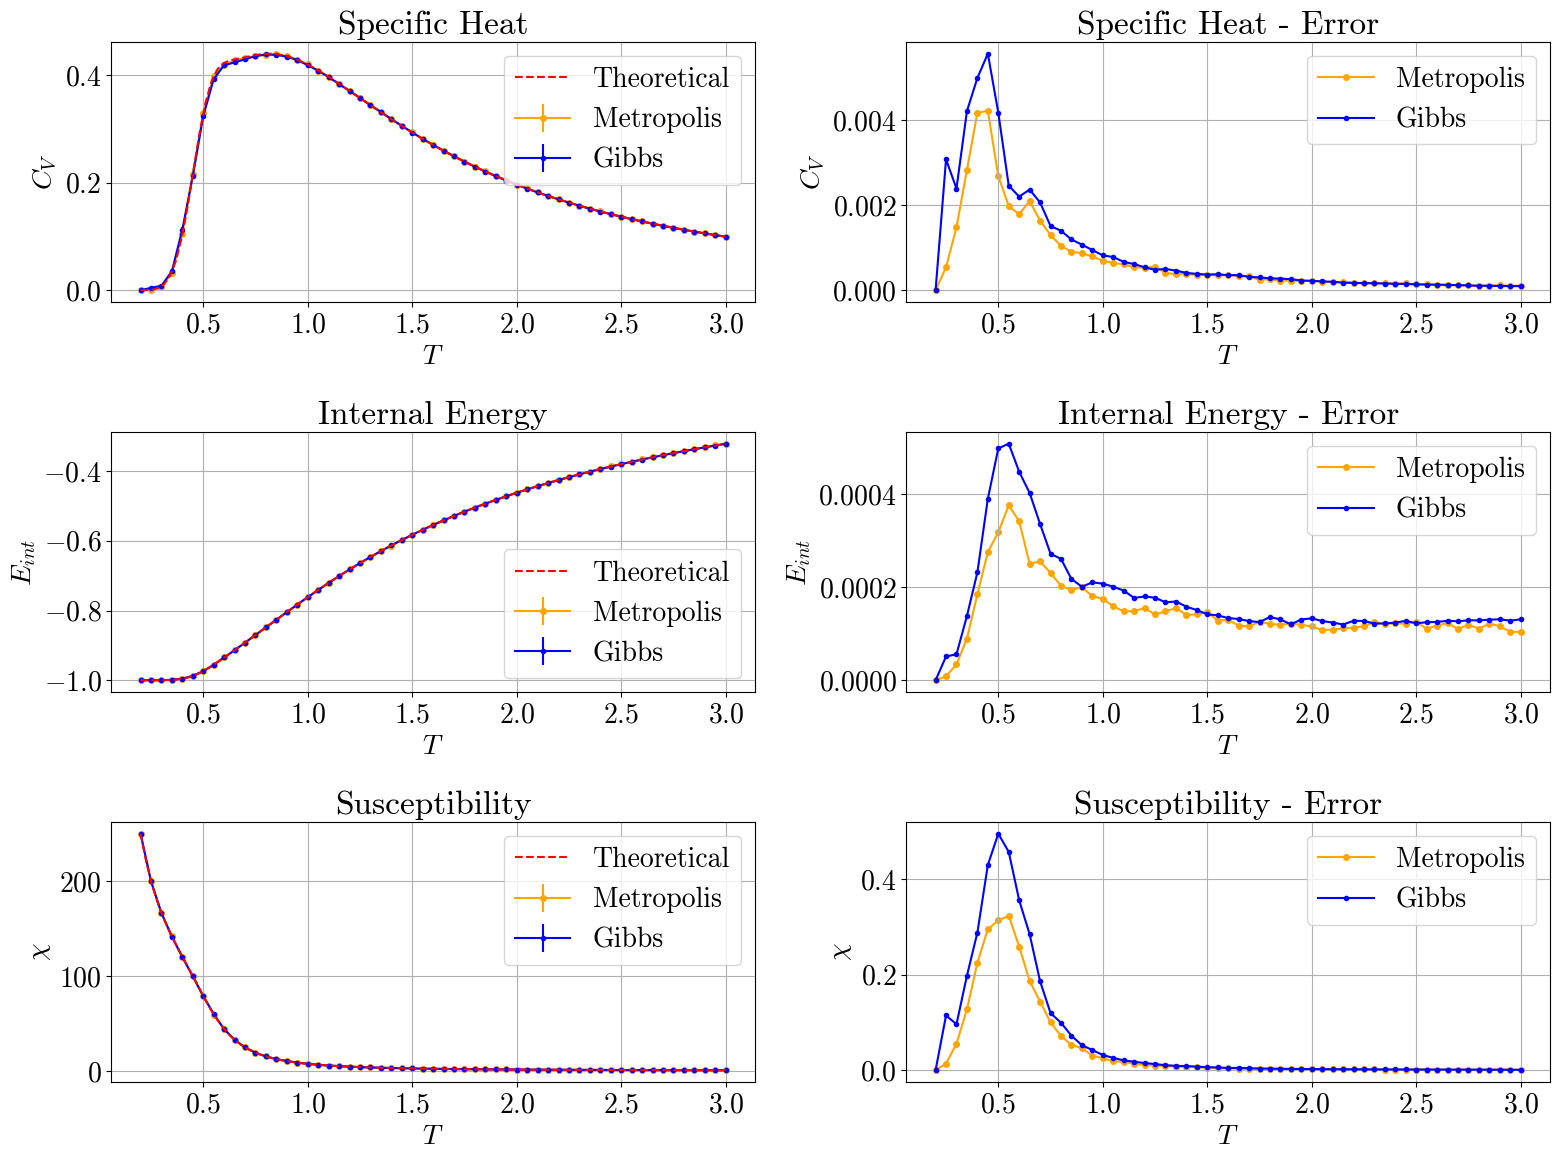

In [177]:

for i in range(0,3):
    plt.subplot(3,2,2*i+1)
    plt.plot(T, theo[i],'--',color='red',label='Theoretical',zorder=3)
    df_me = pd.read_csv('../METRO/NO-FIELD/'+file[i]+'_tot.dat',sep='\t')
    plt.errorbar(df_me['TEMP'],df_me['AVERAGE'],df_me['ERROR'],marker='o',markersize=4,label='Metropolis',color='orange',zorder=1)
    df_gb = pd.read_csv('../GIBBS/NO-FIELD/'+file[i]+'_tot.dat',sep='\t')
    plt.errorbar(df_gb['TEMP'],df_gb['AVERAGE'],df_gb['ERROR'],marker='o',markersize=3,label='Gibbs',color='blue',zorder=2)
    plt.title(label[i])
    plt.ylabel(xlab[i])
    plt.xlabel('$T$')
    plt.grid(True)
    plt.legend()

    plt.subplot(3,2,2*i+2)
    plt.plot(df_me['TEMP'],df_me['ERROR'],marker='o',markersize=4,label='Metropolis',color='orange',zorder=1)
    plt.plot(df_gb['TEMP'],df_gb['ERROR'],marker='o',markersize=3,label='Gibbs',color='blue',zorder=2)
    plt.title(label[i]+' - Error')
    plt.ylabel(xlab[i])
    plt.xlabel('$T$')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

### With External Field $H=0.02$ 

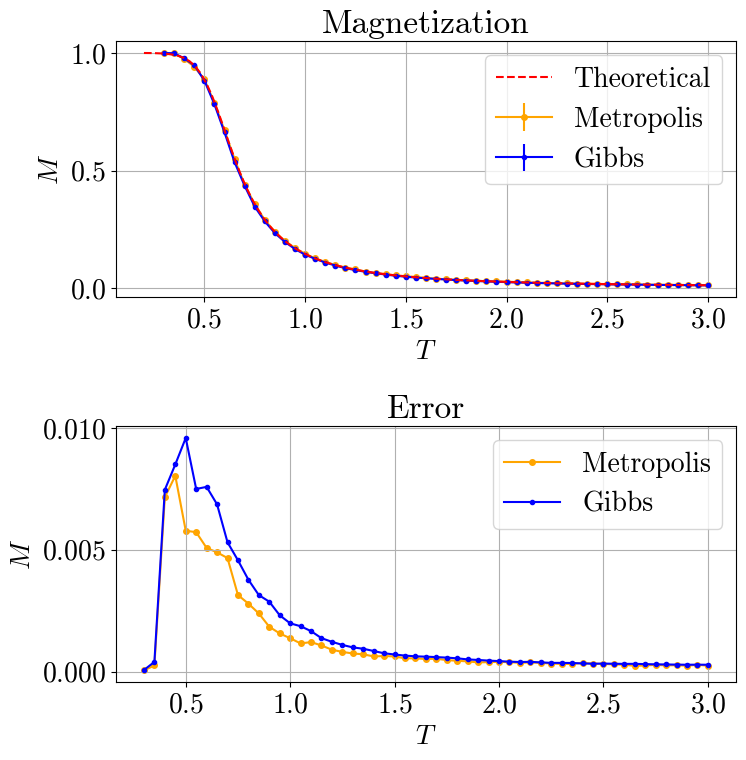

In [178]:
i=3
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(T, theo[i],'--',color='red',label='Theoretical',zorder=3)
df_me = pd.read_csv('../METRO/FIELD/'+file[i]+'_tot.dat',sep='\t')
plt.errorbar(df_me['TEMP'],df_me['AVERAGE'],df_me['ERROR'],marker='o',markersize=4,label='Metropolis',color='orange',zorder=1)
df_gb = pd.read_csv('../GIBBS/FIELD/'+file[i]+'_tot.dat',sep='\t')
plt.errorbar(df_gb['TEMP'],df_gb['AVERAGE'],df_gb['ERROR'],marker='o',markersize=3,label='Gibbs',color='blue',zorder=2)
plt.title(label[i])
plt.ylabel(xlab[i])
plt.xlabel('$T$')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
plt.plot(df_me['TEMP'],df_me['ERROR'],marker='o',markersize=4,label='Metropolis',color='orange',zorder=1)
plt.plot(df_gb['TEMP'],df_gb['ERROR'],marker='o',markersize=3,label='Gibbs',color='blue',zorder=2)
plt.title('Error')
plt.ylabel(xlab[i])
plt.xlabel('$T$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

### Equilibration

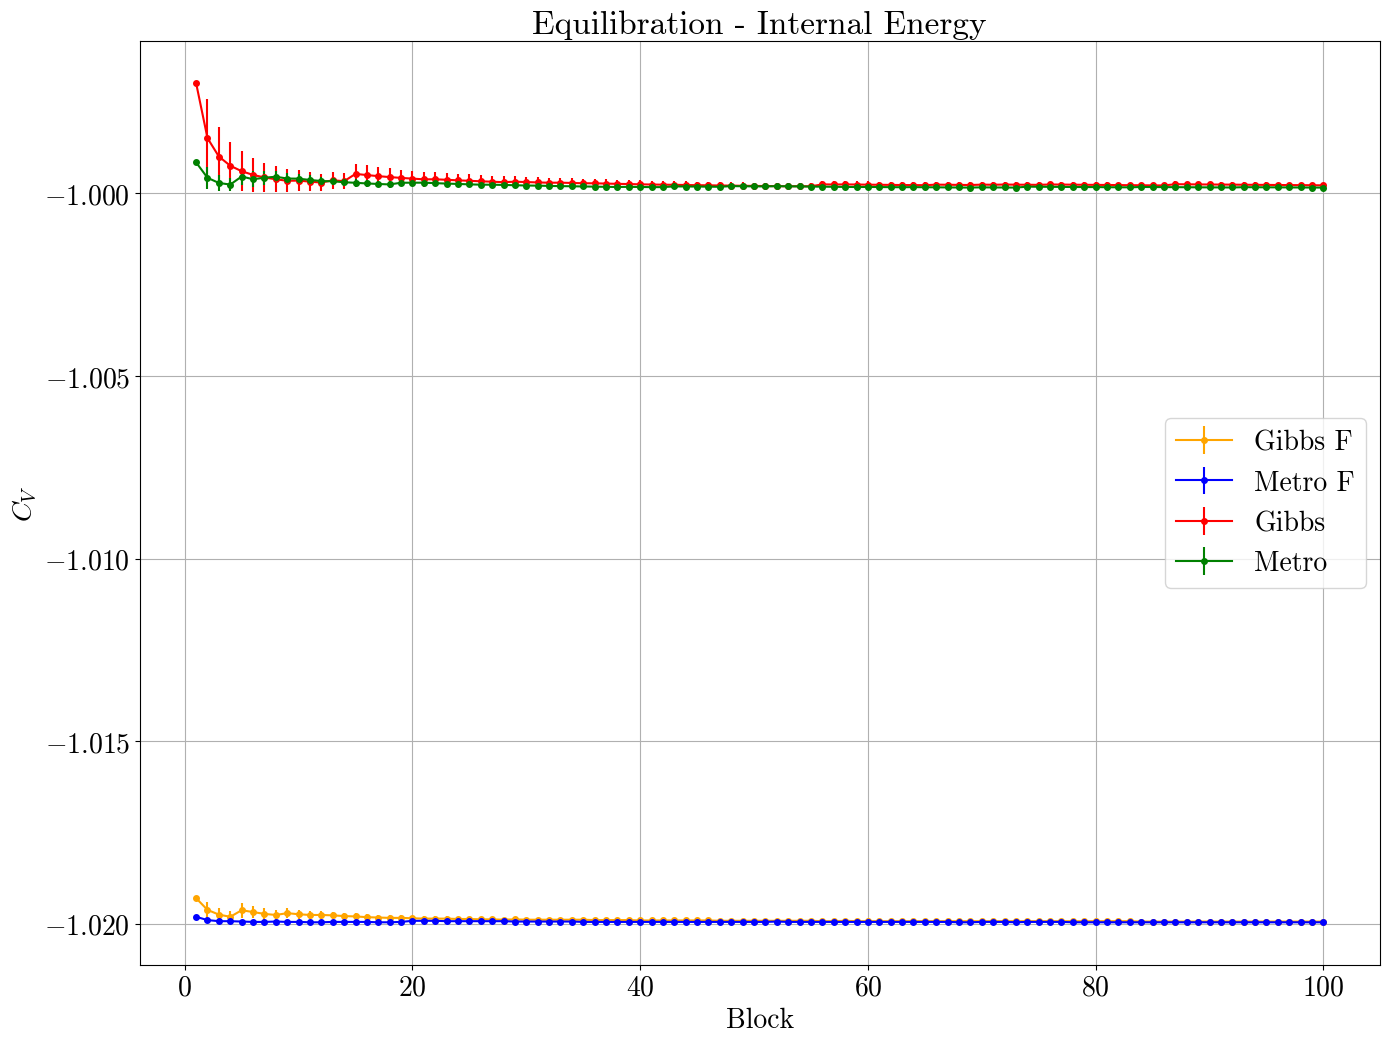

In [179]:
df_03=pd.read_csv('../GIBBS/FIELD/0.3_total_energy.dat',sep='\t')
df_12=pd.read_csv('../GIBBS/NO-FIELD/0.3_total_energy.dat',sep='\t')
df_21=pd.read_csv('../METRO/FIELD/0.3_total_energy.dat',sep='\t')
df_30=pd.read_csv('../METRO/NO-FIELD/0.3_total_energy.dat',sep='\t')
plt.errorbar(df_03['#BLOCK:'],df_03['TE_AVE:'],df_03['ERROR:'],marker='o',markersize=4,label='Gibbs F',color='orange')
plt.errorbar(df_21['#BLOCK:'],df_21['TE_AVE:'],df_21['ERROR:'],marker='o',markersize=4,label='Metro F',color='blue')
plt.errorbar(df_12['#BLOCK:'],df_12['TE_AVE:'],df_12['ERROR:'],marker='o',markersize=4,label='Gibbs',color='red')
plt.errorbar(df_30['#BLOCK:'],df_30['TE_AVE:'],df_30['ERROR:'],marker='o',markersize=4,label='Metro',color='green')
plt.title('Equilibration - Internal Energy')
plt.ylabel('$C_V$')
plt.xlabel('Block')
plt.legend()
plt.grid()
plt.show()


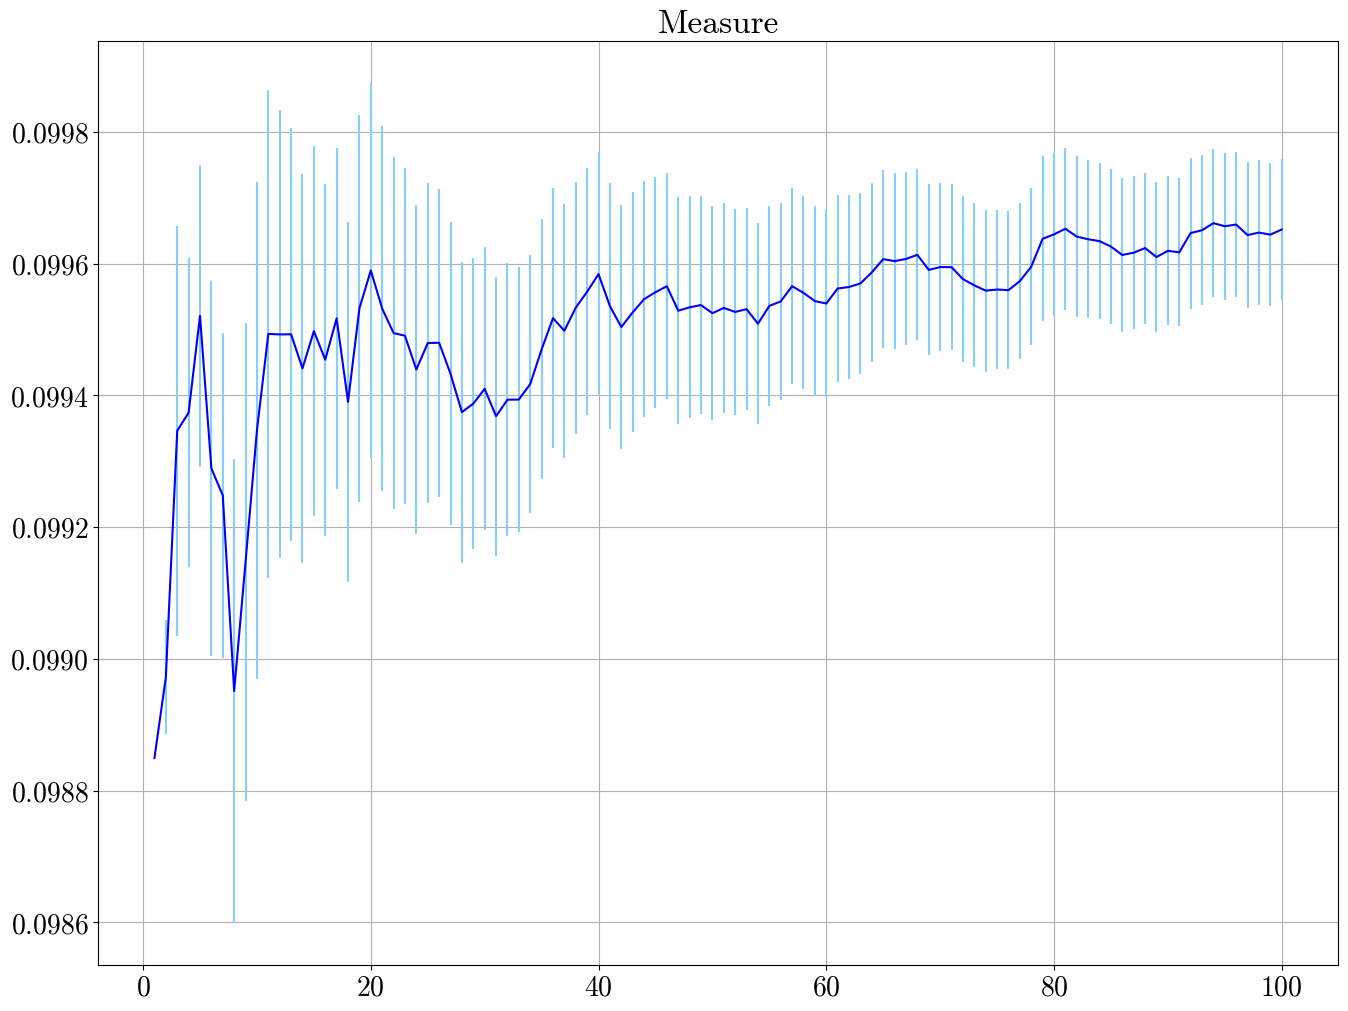

In [180]:
df_temp = pd.read_csv('specific_heat.dat',sep='\t')
plt.errorbar(df_temp.iloc[:,0],df_temp.iloc[:,2],df_temp.iloc[:,3],color='blue',ecolor='lightskyblue')
plt.title('Measure')
plt.grid(True)
plt.show()